In [30]:
%load_ext autoreload
%autoreload 2
from data.visualizations import create_2Dimagegrid
import numpy as np
from server_specific.server_utils import get_patients
from data.preprocessing import clip_scans, min_max_normalization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
patients = get_patients()
patient_x = patients[0]

Now let's get a slice of data in there

In [13]:
z_slice = 80

images = []
titles = []

image, mask = patient_x.get_image_mask_tuple()
ccta_scan_slice = image[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images.extend([ccta_scan_slice, mask_slice])
titles.extend(["original_ccta_scan", "mask"])

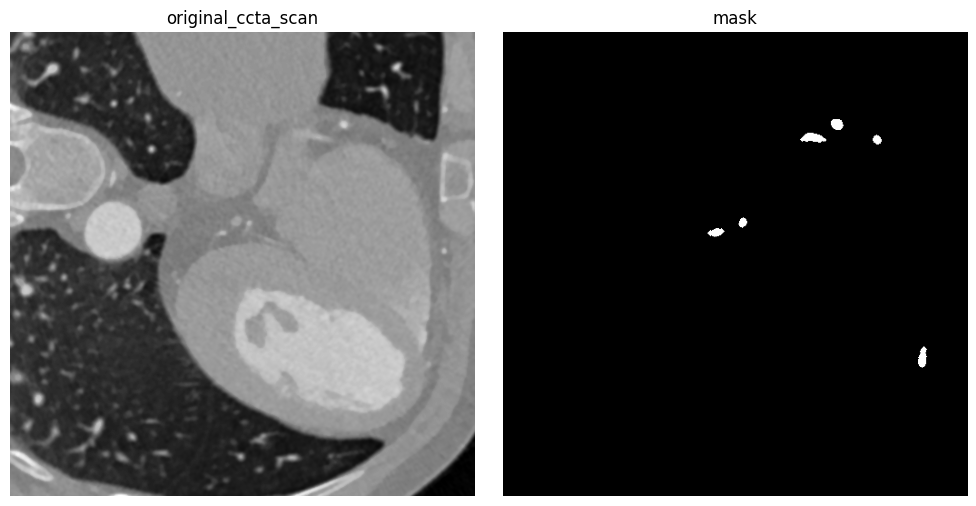

In [14]:
create_2Dimagegrid(images, titles, max_cols = 2)

First step of preprocessing, clipping

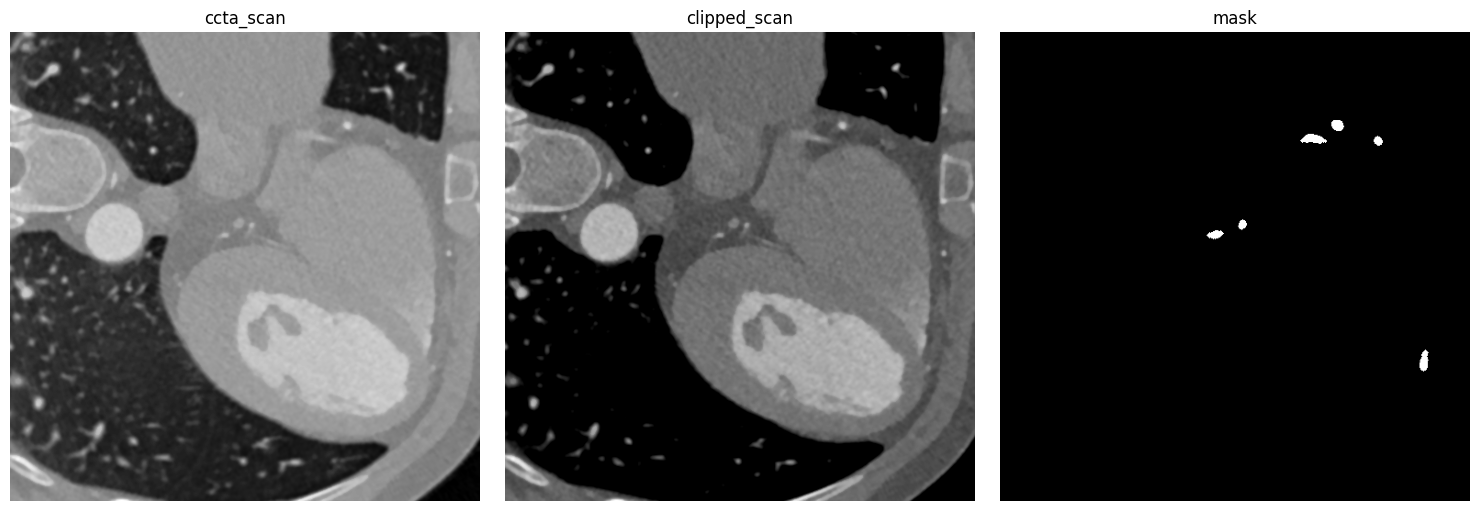

In [26]:
image, mask = patient_x.get_image_mask_tuple()

# clip the image
min_value = -600
max_value = 1000
clipped_image = clip_scans(image.copy(), min_value, max_value)

ccta_scan_slice = image[:, :, z_slice]
clipped_image = clipped_image[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images = [ccta_scan_slice, clipped_image_slice, mask_slice]
titles = ["ccta_scan", "clipped_scan", "mask"]

create_2Dimagegrid(images, titles, max_cols = 4)

second step: min_max_normalization

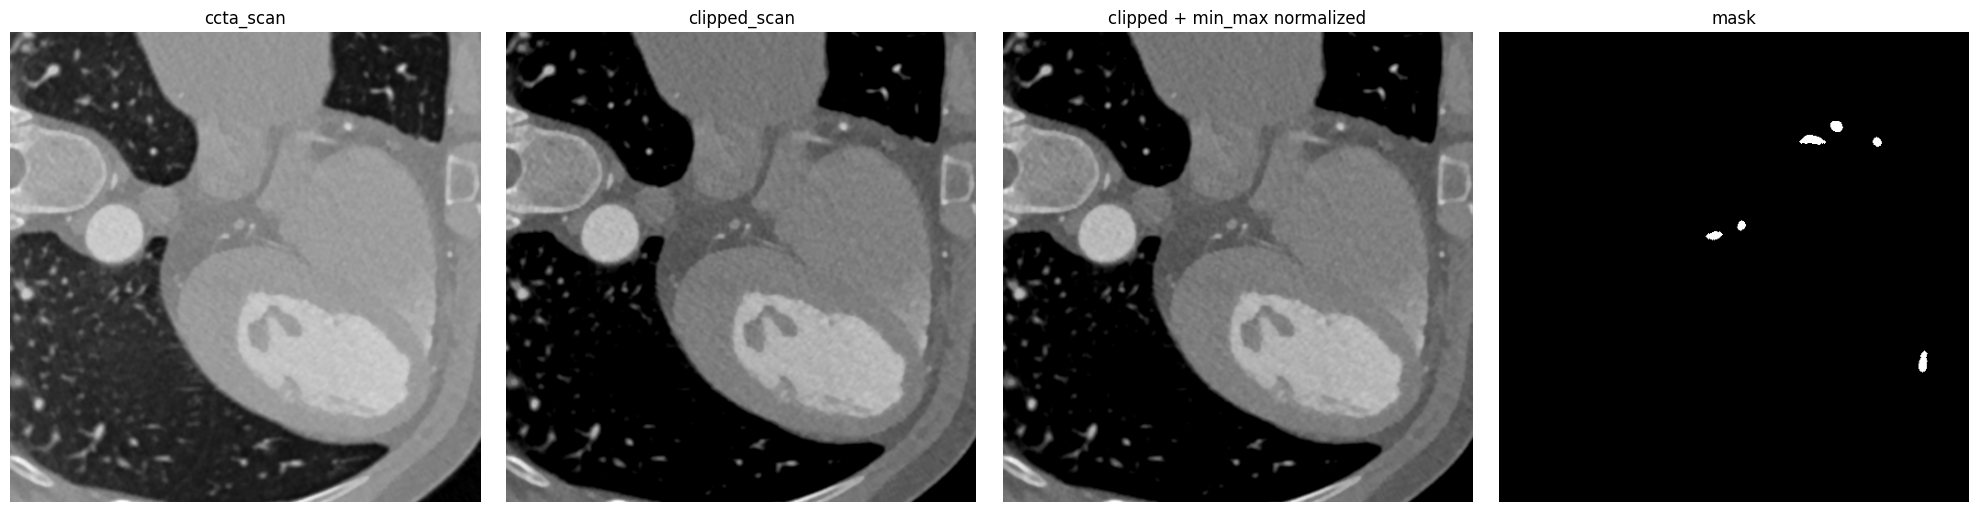

In [32]:
image, mask = patient_x.get_image_mask_tuple()

# clip the image
min_value = -600
max_value = 1000
clipped_image = clip_scans(image.copy(), min_value, max_value)
normalized_clipped = min_max_normalization(clipped_image.copy(), min_value, max_value)

ccta_scan_slice = image[:, :, z_slice]
clipped_image_slice = clipped_image[:, :, z_slice]
normalized_clipped_slice = normalized_clipped[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images = [ccta_scan_slice, clipped_image_slice, normalized_clipped_slice, mask_slice]
titles = ["ccta_scan", "clipped_scan", "clipped + min_max normalized", "mask"]

create_2Dimagegrid(images, titles, max_cols = 4)